# BASIC WEATHER ANALYSIS START

In [1]:
import pandas as pd
from dateutil import tz
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
def utc_to_cst_timestamp_string(ts):
    from_zone = tz.gettz('UTC')
    to_zone = tz.gettz('America/Chicago')
    json_data = {'time': str(ts)}
    utc = datetime.strptime(json_data['time'], '%Y-%m-%d %H:%M:%S +0000 UTC')
    utc = utc.replace(tzinfo=from_zone)
    cst = utc.astimezone(to_zone)
    date_time = cst.strftime("%Y-%m-%d %H:%M:%S")
    return date_time

In [3]:
weather = pd.read_csv('Jan_2008__Aug_2023_weather_data.csv')
neg_temp_cond = weather['temp'] < 0
weather = weather.loc[~neg_temp_cond] # getting rid of observation where weather is negative temperature (-18000)

weather['cst_timestamp'] = weather['dt_iso'].apply(lambda x: utc_to_cst_timestamp_string(x))
weather['date'] = weather['cst_timestamp'].apply(lambda x: x.split(' ')[0])
weather['time'] = weather['cst_timestamp'].apply(lambda x: x.split(' ')[1])
weather['month'] = weather['date'].apply(lambda x: int(x.split('-')[1]))
weather['year'] = weather['date'].apply(lambda x: int(x.split('-')[0]))
weather = weather[weather['date'] > '2007-12-31']

years = weather['year'].unique()
summer_months = [5, 6, 7, 8]

In [5]:
summer_max_weather.reset_index()

,date,temp
0,2008-05-01,82.36
1,2008-05-02,76.59
2,2008-05-03,68.07
3,2008-05-04,75.70
4,2008-05-05,72.37
...,...,...
1951,2023-08-15,92.59
1952,2023-08-16,94.96
1953,2023-08-17,108.86
1954,2023-08-18,109.17


In [7]:
summer = weather[weather['month'].isin(summer_months)]
summer_max_weather = summer.groupby('date')['temp'].max()
summer_max_weather = summer_max_weather.reset_index()
summer_max_weather['month'] = summer_max_weather['date'].apply(lambda x: int(x.split('-')[1]))
summer_max_weather['year'] = summer_max_weather['date'].apply(lambda x: int(x.split('-')[0]))

In [12]:
year_month_max_weather = summer_max_weather.groupby(['year', 'month']).max()

In [15]:
year_month_max_weather.reset_index()

,year,month,date,temp
0,2008,5,2008-05-31,96.19
1,2008,6,2008-06-30,97.21
2,2008,7,2008-07-31,101.19
3,2008,8,2008-08-31,104.13
4,2009,5,2009-05-31,89.33
...,...,...,...,...
59,2022,8,2022-08-31,102.67
60,2023,5,2023-05-31,95.43
61,2023,6,2023-06-30,102.81
62,2023,7,2023-07-31,105.80


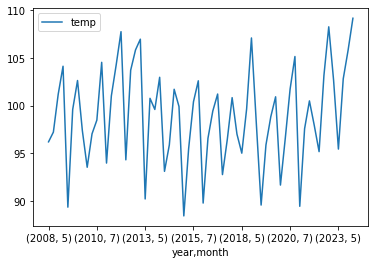

In [13]:
ax = year_month_max_weather.plot()

Almost no difference between actual temp and feels like

In [128]:
(weather['temp'] - weather['feels_like']).describe()

count    137033.000000
mean         -0.067920
std           3.908971
min         -12.600000
25%          -1.280000
50%           0.020000
75%           1.940000
max          12.600000
dtype: float64

Local N day average calculation

The blue line is the original weather signal, the purple line is the consecutive 5 day average

In [129]:
import numpy as np

In [130]:
import matplotlib.ticker as ticker

Took a super long time to super impose the two dates, just do it as a list

In [131]:
summer_seasons = weather['date']
for date in weather['date'].unique():
    print(date)

2008-01-01
2008-01-02
2008-01-03
2008-01-04
2008-01-05
2008-01-06
2008-01-07
2008-01-08
2008-01-09
2008-01-10
2008-01-11
2008-01-12
2008-01-13
2008-01-14
2008-01-15
2008-01-16
2008-01-17
2008-01-18
2008-01-19
2008-01-20
2008-01-21
2008-01-22
2008-01-23
2008-01-24
2008-01-25
2008-01-26
2008-01-27
2008-01-28
2008-01-29
2008-01-30
2008-01-31
2008-02-01
2008-02-02
2008-02-03
2008-02-04
2008-02-05
2008-02-06
2008-02-07
2008-02-08
2008-02-09
2008-02-10
2008-02-11
2008-02-12
2008-02-13
2008-02-14
2008-02-15
2008-02-16
2008-02-17
2008-02-18
2008-02-19
2008-02-20
2008-02-21
2008-02-22
2008-02-23
2008-02-24
2008-02-25
2008-02-26
2008-02-27
2008-02-28
2008-02-29
2008-03-01
2008-03-02
2008-03-03
2008-03-04
2008-03-05
2008-03-06
2008-03-07
2008-03-08
2008-03-09
2008-03-10
2008-03-11
2008-03-12
2008-03-13
2008-03-14
2008-03-15
2008-03-16
2008-03-17
2008-03-18
2008-03-19
2008-03-20
2008-03-21
2008-03-22
2008-03-23
2008-03-24
2008-03-25
2008-03-26
2008-03-27
2008-03-28
2008-03-29
2008-03-30
2008-03-31

2011-01-24
2011-01-25
2011-01-26
2011-01-27
2011-01-28
2011-01-29
2011-01-30
2011-01-31
2011-02-01
2011-02-02
2011-02-03
2011-02-04
2011-02-05
2011-02-06
2011-02-07
2011-02-08
2011-02-09
2011-02-10
2011-02-11
2011-02-12
2011-02-13
2011-02-14
2011-02-15
2011-02-16
2011-02-17
2011-02-18
2011-02-19
2011-02-20
2011-02-21
2011-02-22
2011-02-23
2011-02-24
2011-02-25
2011-02-26
2011-02-27
2011-02-28
2011-03-01
2011-03-02
2011-03-03
2011-03-04
2011-03-05
2011-03-06
2011-03-07
2011-03-08
2011-03-09
2011-03-10
2011-03-11
2011-03-12
2011-03-13
2011-03-14
2011-03-15
2011-03-16
2011-03-17
2011-03-18
2011-03-19
2011-03-20
2011-03-21
2011-03-22
2011-03-23
2011-03-24
2011-03-25
2011-03-26
2011-03-27
2011-03-28
2011-03-29
2011-03-30
2011-03-31
2011-04-01
2011-04-02
2011-04-03
2011-04-04
2011-04-05
2011-04-06
2011-04-07
2011-04-08
2011-04-09
2011-04-10
2011-04-11
2011-04-12
2011-04-13
2011-04-14
2011-04-15
2011-04-16
2011-04-17
2011-04-18
2011-04-19
2011-04-20
2011-04-21
2011-04-22
2011-04-23
2011-04-24

2016-02-25
2016-02-26
2016-02-27
2016-02-28
2016-02-29
2016-03-01
2016-03-02
2016-03-03
2016-03-04
2016-03-05
2016-03-06
2016-03-07
2016-03-08
2016-03-09
2016-03-10
2016-03-11
2016-03-12
2016-03-13
2016-03-14
2016-03-15
2016-03-16
2016-03-17
2016-03-18
2016-03-19
2016-03-20
2016-03-21
2016-03-22
2016-03-23
2016-03-24
2016-03-25
2016-03-26
2016-03-27
2016-03-28
2016-03-29
2016-03-30
2016-03-31
2016-04-01
2016-04-02
2016-04-03
2016-04-04
2016-04-05
2016-04-06
2016-04-07
2016-04-08
2016-04-09
2016-04-10
2016-04-11
2016-04-12
2016-04-13
2016-04-14
2016-04-15
2016-04-16
2016-04-17
2016-04-18
2016-04-19
2016-04-20
2016-04-21
2016-04-22
2016-04-23
2016-04-24
2016-04-25
2016-04-26
2016-04-27
2016-04-28
2016-04-29
2016-04-30
2016-05-01
2016-05-02
2016-05-03
2016-05-04
2016-05-05
2016-05-06
2016-05-07
2016-05-08
2016-05-09
2016-05-10
2016-05-11
2016-05-12
2016-05-13
2016-05-14
2016-05-15
2016-05-16
2016-05-17
2016-05-18
2016-05-19
2016-05-20
2016-05-21
2016-05-22
2016-05-23
2016-05-24
2016-05-25

2019-10-17
2019-10-18
2019-10-19
2019-10-20
2019-10-21
2019-10-22
2019-10-23
2019-10-24
2019-10-25
2019-10-26
2019-10-27
2019-10-28
2019-10-29
2019-10-30
2019-10-31
2019-11-01
2019-11-02
2019-11-03
2019-11-04
2019-11-05
2019-11-06
2019-11-07
2019-11-08
2019-11-09
2019-11-10
2019-11-11
2019-11-12
2019-11-13
2019-11-14
2019-11-15
2019-11-16
2019-11-17
2019-11-18
2019-11-19
2019-11-20
2019-11-21
2019-11-22
2019-11-23
2019-11-24
2019-11-25
2019-11-26
2019-11-27
2019-11-28
2019-11-29
2019-11-30
2019-12-01
2019-12-02
2019-12-03
2019-12-04
2019-12-05
2019-12-06
2019-12-07
2019-12-08
2019-12-09
2019-12-10
2019-12-11
2019-12-12
2019-12-13
2019-12-14
2019-12-15
2019-12-16
2019-12-17
2019-12-18
2019-12-19
2019-12-20
2019-12-21
2019-12-22
2019-12-23
2019-12-24
2019-12-25
2019-12-26
2019-12-27
2019-12-28
2019-12-29
2019-12-30
2019-12-31
2020-01-01
2020-01-02
2020-01-03
2020-01-04
2020-01-05
2020-01-06
2020-01-07
2020-01-08
2020-01-09
2020-01-10
2020-01-11
2020-01-12
2020-01-13
2020-01-14
2020-01-15

2023-05-13
2023-05-14
2023-05-15
2023-05-16
2023-05-17
2023-05-18
2023-05-19
2023-05-20
2023-05-21
2023-05-22
2023-05-23
2023-05-24
2023-05-25
2023-05-26
2023-05-27
2023-05-28
2023-05-29
2023-05-30
2023-05-31
2023-06-01
2023-06-02
2023-06-03
2023-06-04
2023-06-05
2023-06-06
2023-06-07
2023-06-08
2023-06-09
2023-06-10
2023-06-11
2023-06-12
2023-06-13
2023-06-14
2023-06-15
2023-06-16
2023-06-17
2023-06-18
2023-06-19
2023-06-20
2023-06-21
2023-06-22
2023-06-23
2023-06-24
2023-06-25
2023-06-26
2023-06-27
2023-06-28
2023-06-29
2023-06-30
2023-07-01
2023-07-02
2023-07-03
2023-07-04
2023-07-05
2023-07-06
2023-07-07
2023-07-08
2023-07-09
2023-07-10
2023-07-11
2023-07-12
2023-07-13
2023-07-14
2023-07-15
2023-07-16
2023-07-17
2023-07-18
2023-07-19
2023-07-20
2023-07-21
2023-07-22
2023-07-23
2023-07-24
2023-07-25
2023-07-26
2023-07-27
2023-07-28
2023-07-29
2023-07-30
2023-07-31
2023-08-01
2023-08-02
2023-08-03
2023-08-04
2023-08-05
2023-08-06
2023-08-07
2023-08-08
2023-08-09
2023-08-10
2023-08-11

In [132]:
summer_dates = weather[(weather['date'] >= '2008-05-01') & (weather['date'] <= '2008-08-31')]['date'].unique()

In [133]:
year = 2008
yearly_max_weather = pd.DataFrame({'date': summer_dates})
summer = weather[(weather['date'] >= f'{year}-05-01') & (weather['date'] <= f'{year}-08-31')]
max_weather = summer.groupby('date')['temp'].max()
yearly_max_weather[f'{year}'] = max_weather.values

In [134]:
yearly_max_weather

,date,2008
0,2008-05-01,82.36
1,2008-05-02,76.59
2,2008-05-03,68.07
3,2008-05-04,75.70
4,2008-05-05,72.37
...,...,...
118,2008-08-27,93.81
119,2008-08-28,93.81
120,2008-08-29,93.79
121,2008-08-30,93.06


In [135]:
five_day_average = max_weather.groupby(np.arange(len(max_weather))//5).mean()
five_day_avg_dates = [max_weather.index[i] for i in range(0, max_weather.shape[0], 5)]
five_day_avg_dates

['2008-05-01',
 '2008-05-06',
 '2008-05-11',
 '2008-05-16',
 '2008-05-21',
 '2008-05-26',
 '2008-05-31',
 '2008-06-05',
 '2008-06-10',
 '2008-06-15',
 '2008-06-20',
 '2008-06-25',
 '2008-06-30',
 '2008-07-05',
 '2008-07-10',
 '2008-07-15',
 '2008-07-20',
 '2008-07-25',
 '2008-07-30',
 '2008-08-04',
 '2008-08-09',
 '2008-08-14',
 '2008-08-19',
 '2008-08-24',
 '2008-08-29']

In [136]:
len(max_weather.values)

123

In [137]:
yearly_max_weather.columns

Index(['date', '2008'], dtype='object')

In [138]:
max_weather

date
2008-05-01    82.36
2008-05-02    76.59
2008-05-03    68.07
2008-05-04    75.70
2008-05-05    72.37
              ...  
2008-08-27    93.81
2008-08-28    93.81
2008-08-29    93.79
2008-08-30    93.06
2008-08-31    91.11
Name: temp, Length: 123, dtype: float64

In [139]:
summer_2023 = weather[weather['date'] >= '2023-05-01']
summer_2023_max_weather = summer_2023.groupby('date')['temp'].max()
summer_2023_max_weather = summer_2023_max_weather.reset_index()
summer_2023_max_weather['month'] = summer_2023_max_weather['date'].apply(lambda x: int(x.split('-')[1]))
summer_2023_max_weather['month'].unique()

array([5, 6, 7, 8], dtype=int64)

In [140]:
aug_2023_max_weather = summer_2023_max_weather[summer_2023_max_weather['month'] == 8]

In [141]:
five_day_averages = list()
yearly_max_weather = pd.DataFrame({'date': summer_dates})
yearly_five_day_avg = pd.DataFrame({'date': five_day_avg_dates})

for year in years:
    summer = weather[(weather['date'] >= f'{year}-05-01') & (weather['date'] <= f'{year}-08-31')]
    max_weather = summer.groupby('date')['temp'].max()
    try:
        yearly_max_weather[f'{year}'] = max_weather.values
    except: # 2023 will not have all the days
        print(f'Year Max Error: {year}')
        temps = list(max_weather.values)
        temps.extend([aug_2023_max_weather['temp'].mean() for i in range(yearly_max_weather.shape[0] - len(max_weather.values))])
        yearly_max_weather[f'{year}'] = temps
    #display(max_weather)
    five_day_average = max_weather.groupby(np.arange(len(max_weather))//5).mean()
    yearly_five_day_avg[f'{year}'] = five_day_average

Year Max Error: 2023


### Plotting 15 years worth of temperature data

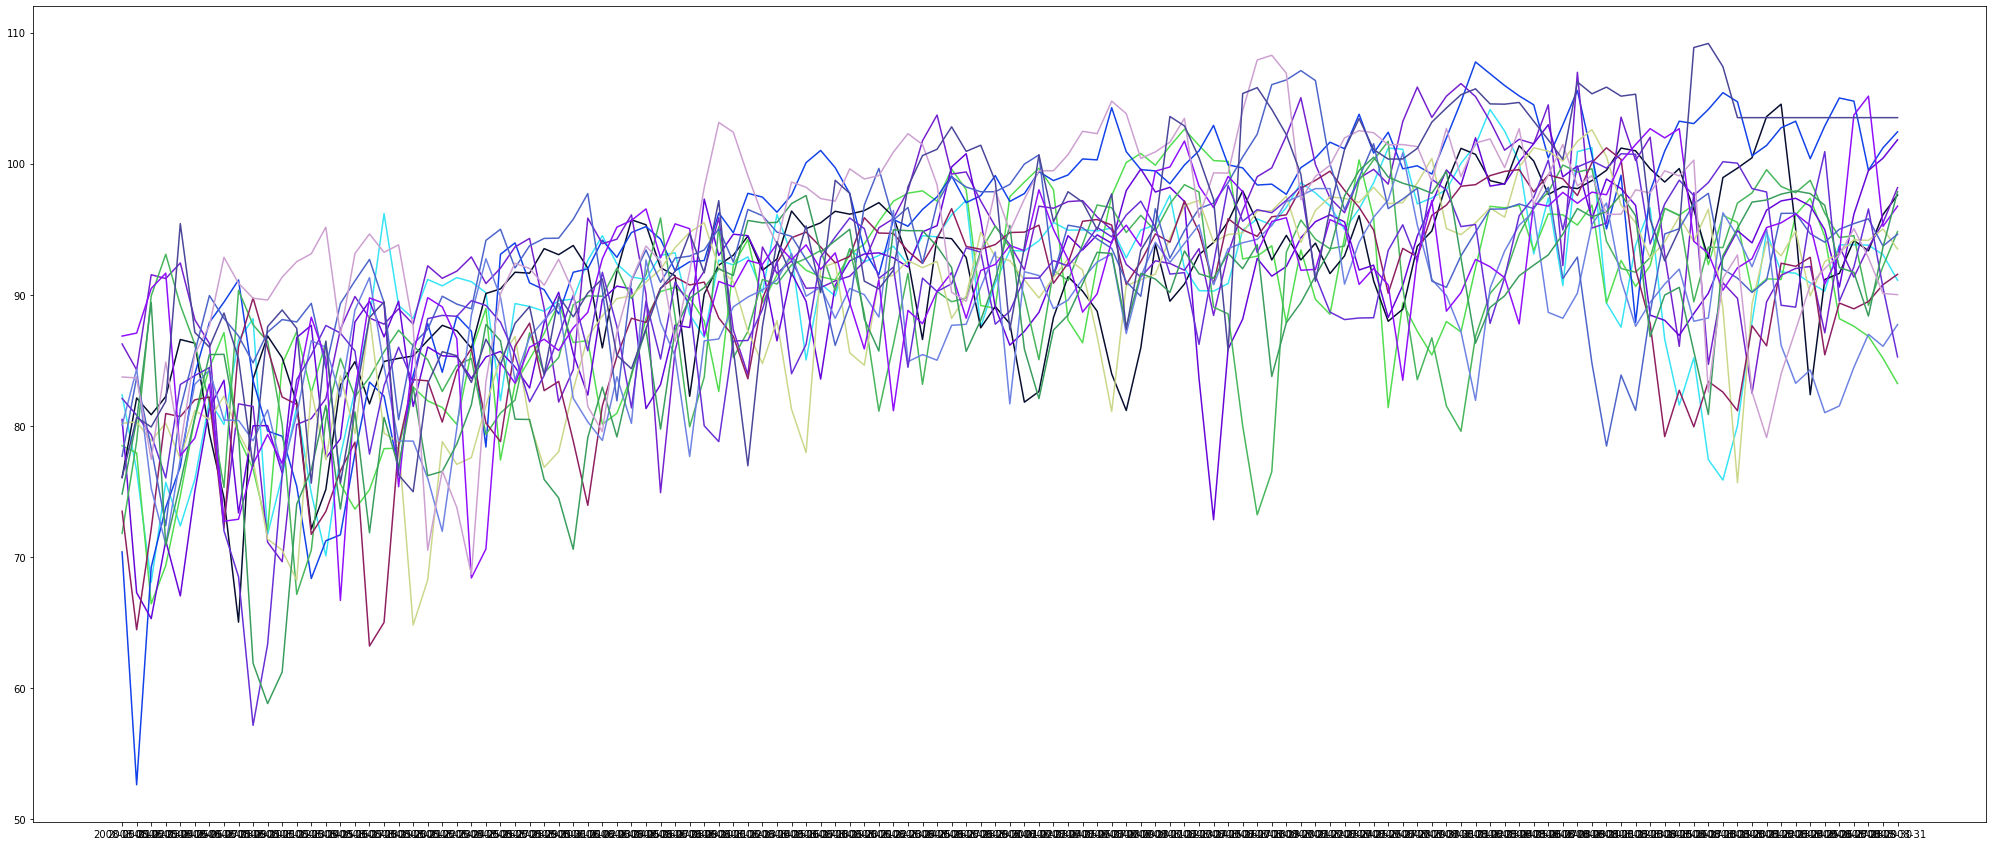

In [142]:
plt.rcParams["figure.figsize"] = (35, 15)
fig, ax = plt.subplots()

for year in yearly_five_day_avg.columns[1:]:
    col = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(yearly_max_weather['date'], yearly_max_weather[year], color=col)
    #summer = weather[(weather['date'] >= f'{year}-05-01') & (weather['date'] <= f'{year}-08-31')]


Boxplot comparing yearly max temperatures

In [143]:
yearly_max_weather

,date,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,2008-05-01,82.36,78.49,76.06,70.39,86.25,80.49,71.80,80.20,73.49,80.04,77.68,82.09,86.85,74.80,83.73,76.080000
1,2008-05-02,76.59,77.94,82.13,52.63,84.27,67.28,78.82,80.31,64.45,84.34,83.71,80.82,87.08,80.42,83.66,80.650000
2,2008-05-03,68.07,66.43,80.85,69.22,91.53,65.30,89.92,78.87,72.12,75.24,78.31,79.32,90.48,89.42,77.45,79.920000
3,2008-05-04,75.70,69.35,82.24,73.78,91.24,71.24,93.09,80.20,80.94,70.97,72.39,76.03,91.65,70.86,84.87,81.880000
4,2008-05-05,72.37,74.68,86.59,76.89,92.43,67.03,89.22,77.49,80.71,77.49,81.28,83.16,77.72,75.63,78.42,95.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2008-08-27,93.81,88.18,91.63,105.01,93.69,90.59,94.37,93.22,89.37,81.52,95.00,89.51,93.11,92.08,93.04,103.511579
119,2008-08-28,93.81,87.60,94.14,104.77,91.35,96.15,94.51,94.19,88.93,84.47,95.43,92.12,103.71,91.71,95.05,103.511579
120,2008-08-29,93.79,86.83,93.36,99.50,93.63,99.48,89.19,94.15,89.49,86.99,95.79,96.55,105.15,88.38,92.82,103.511579
121,2008-08-30,93.06,85.15,96.12,101.21,95.50,100.42,92.17,95.02,90.77,86.07,93.72,90.54,95.22,93.63,90.10,103.511579


In [144]:
years

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023], dtype=int64)

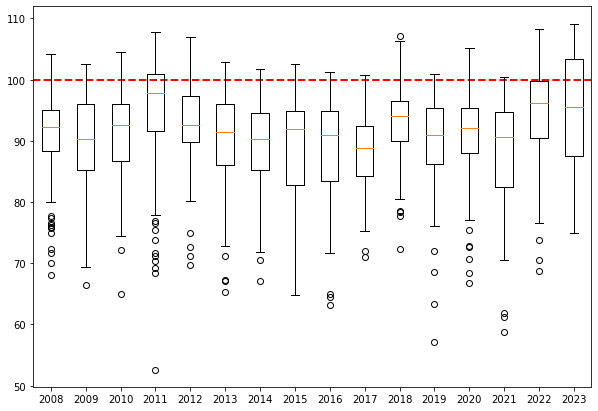

In [145]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(10)
years = list(yearly_max_weather.columns[1:])
data_to_plot = [yearly_max_weather[year] for year in years]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.set_xticklabels(years)
plt.axhline(y = 100, color = 'r', linestyle = 'dashed', linewidth=2)

ax.boxplot(data_to_plot)
plt.show()

In [146]:
desc_df = yearly_max_weather.describe()
type(desc_df)

pandas.core.frame.DataFrame

In [147]:
yearly_max_weather['month'] = yearly_max_weather['date'].apply(lambda x: int(x.split('-')[1]))

In [148]:
year_month_mean_max_temp = yearly_max_weather.groupby('month').mean()

In [149]:
year_month_mean_max_temp.index

Int64Index([5, 6, 7, 8], dtype='int64', name='month')

In [150]:
year_month_mean_max_temp.columns

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [151]:
year_month_mean_max_temp

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
month,,,,,,,,,,,,,,,,
5,83.140000,80.378387,83.896774,81.001935,86.421935,81.413548,83.068065,78.487419,79.267097,82.501613,87.548710,81.811290,82.308387,77.478710,86.990645,84.185161
6,92.061667,91.002667,92.699333,95.769000,92.776333,91.034667,89.693333,89.568667,90.367667,87.466667,93.997000,88.923000,91.232667,89.561000,94.980667,92.918333
7,95.511613,94.367742,91.024194,100.121935,97.108387,92.360323,91.561290,94.234194,94.906774,93.171290,97.587742,93.365484,94.279355,92.522903,101.344516,98.384516
8,92.208710,92.807419,97.764516,102.264839,95.750000,96.292581,94.395806,94.956452,91.780645,89.370323,92.842903,95.823548,96.008710,92.969355,94.521935,103.511579


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabe'

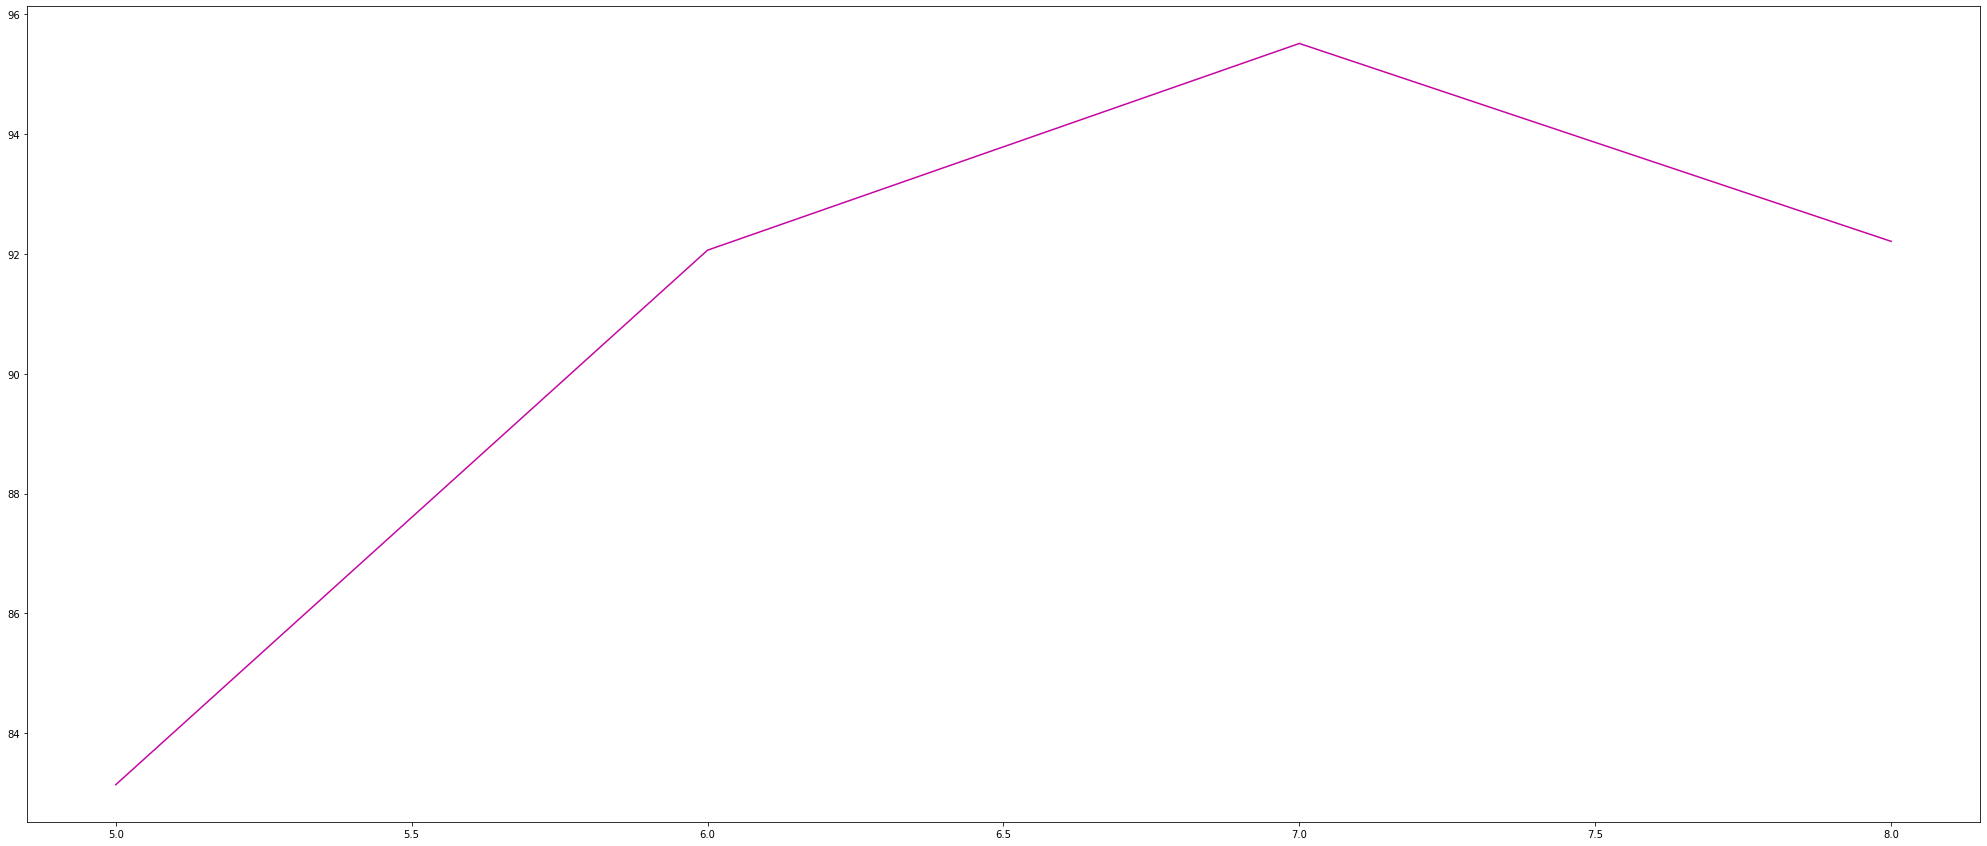

In [152]:
for year in year_month_mean_max_temp.columns:
    col = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(year_month_mean_max_temp.index, year_month_mean_max_temp[year], color=col)
    plt.xlabe

In [ ]:
summer = weather[weather['month'].isin(summer_months)]

In [ ]:
summer.groupby(['year', 'month'])['temp'].max()

In [ ]:
summer.groupby('month')['temp'].mean()

In [ ]:
summer.groupby('year')['temp'].mean()

In [ ]:
year_month_mean_temp = summer.groupby(['year', 'month'])['temp'].mean()
for x in year_month_mean_temp:
    print(x)

In [ ]:
type(year_month_mean_temp)

In [ ]:
summer.groupby('month')['temp'].min()

In [ ]:
summer.groupby('month')['temp'].max()

In [ ]:
summer.groupby(['year', 'month']).groups.keys()

In [ ]:
desc_df

In [ ]:
cond = (desc_df.loc['max'] > 105).values

In [ ]:
desc_df.loc[:, cond]

In [ ]:
yearly_max_weather.loc[]

In [ ]:
ax.boxplot([yearly_max_weather['2023']])
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (35, 15)


boxplot = yearly_max_weather.boxplot(column=['2008', '2009', '2010']) 

### Plotting 15 years worth of 5 day averages

In [ ]:
plt.rcParams["figure.figsize"] = (25, 15)
fig, ax = plt.subplots()

for year in yearly_five_day_avg.columns[1:]:
    col = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(yearly_max_weather['date'], yearly_five_day_avg[year], color=col)
    #summer = weather[(weather['date'] >= f'{year}-05-01') & (weather['date'] <= f'{year}-08-31')]


In [ ]:
[yearly_five_day_avg['2008'] for year in ]
plt.boxplot()

In [ ]:
plt.rcParams["figure.figsize"] = (25, 15)
fig, ax = plt.subplots()

#ax.plot_date(max_weather.index, max_weather, linestyle='solid', linewidth=5, label='daily')

for year in years:
    try:
        summer = weather[(weather['date'] >= f'{year}-05-01') & (weather['date'] <= f'{year}-08-31')]
        max_weather = summer.groupby('date')['temp'].max()
        five_day_average = max_weather.groupby(np.arange(len(max_weather))//5).mean()
        five_day_average.index = [max_weather.index[i] for i in range(0, max_weather.shape[0], 5)]
        col = (np.random.random(), np.random.random(), np.random.random())
        ax.plot_date(five_day_average.index, five_day_average, linestyle='solid', linewidth=5, color=col, label=f'Summer {year}-5-Day-Avg')
        #ax.plot_date(max_weather.index, max_weather, linestyle='solid', linewidth=5, color=col, label=f'Summer {year}-Max-Temperature')
        original_labels = [str(label) for label in ax.get_xticks()]
        #labels_of_interest = [str(i) for i in np.arange(0,len(original_labels),5)]
        new_labels = [str(max_weather.index[int(label)*5]) for label in original_labels]
        #ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))  # x-axis ticks at multiples of 2
        ax.set_xticklabels(new_labels)
    except:
        print(f'Error with year: {year}')



plt.xticks(rotation=90)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.title('Summer 2023 Max Weather', fontsize=35)
#plt.axhline(y = 100, color = 'r', linestyle = 'dashed', linewidth=5)
#plt.axvline(x = 83, color = 'k', linestyle = 'dashed', linewidth=5)
plt.legend(fontsize=25)
print()
print()
plt.show()
print()
print()
#fig.savefig('Summer_2023_Max_Weather.png')

In [ ]:
max_weather_feels_like = summer_2023.groupby('date')['feels_like'].max()
five_day_feels_like_average = max_weather_feels_like.groupby(np.arange(len(max_weather_feels_like))//5).mean()
five_day_feels_like_average.index = [max_weather_feels_like.index[i] for i in range(0, max_weather_feels_like.shape[0], 5)]
plt.rcParams["figure.figsize"] = (30, 15)
fig, ax = plt.subplots()
ax.plot_date(max_weather_feels_like.index, max_weather_feels_like, linestyle='solid', linewidth=5, label='daily')
#ax.plot_date(three_day_average.index, three_day_average, linestyle='solid', linewidth=5, color='g')
ax.plot_date(five_day_feels_like_average.index, five_day_feels_like_average, linestyle='solid', linewidth=5, color='m', label='5-Day-Avg')
original_labels = [str(label) for label in ax.get_xticks()]
labels_of_interest = [str(i) for i in np.arange(0,len(original_labels),5)]
new_labels = [str(max_weather.index[int(label)]) if label in labels_of_interest else "" for label in original_labels]
ax.set_xticklabels(new_labels)
plt.xticks(rotation=90)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.title('Summer 2023 "Feels Like" Max Weather', fontsize=35)
plt.axhline(y = 100, color = 'r', linestyle = 'dashed', linewidth=5)
plt.axvline(x = 83, color = 'k', linestyle = 'dashed', linewidth=5)
plt.legend(fontsize=25)
print()
print()
plt.show()
fig.savefig('Summer_2023_Max_Weather_Feels_Like.png')
print()
print()

This time using moving averages, with sliding window of size 3 and 5 respectively

In [ ]:
ma_3_max_weather = max_weather.rolling(3).mean()
ma_5_max_weather = max_weather.rolling(5).mean()

In [ ]:
plt.rcParams["figure.figsize"] = (30, 15)
fig, ax = plt.subplots()
ax.plot_date(max_weather.index, max_weather, linestyle='solid', linewidth=5, label='Actual')
#ax.plot_date(ma_3_max_weather.index, ma_3_max_weather, linestyle='solid', linewidth=5, color='g')
ax.plot_date(ma_5_max_weather.index, ma_5_max_weather, linestyle='solid', linewidth=5, color='g', label='5 Day Moving Average')
#ax.plot_date(five_day_average.index, five_day_average, linestyle='solid', linewidth=5, color='m')
original_labels = [str(label) for label in ax.get_xticks()]
labels_of_interest = [str(i) for i in np.arange(0,len(original_labels),5)]
new_labels = [str(max_weather.index[int(label)]) if label in labels_of_interest else "" for label in original_labels]
ax.set_xticklabels(new_labels)
plt.xticks(rotation=90)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('May - August 2023 Max Weather with Moving Window averages', fontsize=30)
#plt.axhline(y = 100, color = 'r', linestyle = 'dashed', linewidth=5)
#plt.axvline(x = 83, color = 'k', linestyle = 'dashed', linewidth=5)
plt.legend(fontsize=25)
plt.show()
#plt.savefig()

In [ ]:
summer_2023 = weather[weather['date'] >= '2023-05-01']

In [ ]:
summer_2023.shape[0]

In [ ]:
months = []

In [ ]:
import calendar

In [ ]:
def get_month_index(data):
    months = list(calendar.month_name)
    months.remove('')
    index = [months[month - 1] for month in data.index]
    data.index = index
    return data

In [ ]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, y[i], ha = 'center', fontsize=12)

In [ ]:
degree_sign = u'\N{DEGREE SIGN}'

### Monthly Max Temperature

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
month_max_temp = summer_2023.groupby(['month'])['temp'].max().round()
month_max_temp = get_month_index(month_max_temp)
plt.bar(month_max_temp.index, month_max_temp, color=('#fed5c1', '#ff935f', '#ff732e', '#cc4200'))
plt.title('Monthly Max Temperature')
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Temperature {degree_sign}', fontsize=13)
x = list(month_max_temp.index)
y = list(month_max_temp.values)
add_labels(x, y)
plt.show()

In [ ]:
month_max_temp

Monthly Max Feels Like Temparature

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
month_feels_like_max_temp = summer_2023.groupby(['month'])['feels_like'].max().round()
month_feels_like_max_temp = get_month_index(month_feels_like_max_temp)
plt.bar(month_feels_like_max_temp.index, month_feels_like_max_temp, color=('#ff732e', '#cc4200', '#cc4200', '#cc4200'))
plt.title('Monthly Feels Like Max Temperature')
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Temperature {degree_sign}', fontsize=13)
x = list(month_feels_like_max_temp.index)
y = list(month_feels_like_max_temp.values)
add_labels(x, y)
plt.show()

June has the largest difference

### Max Temp Comparison 

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
fig, ax = plt.subplots()
ax.plot(month_max_temp.index, month_max_temp, linestyle='solid', color='#ff935f', label='Actual')
ax.plot(month_feels_like_max_temp.index, month_feels_like_max_temp, linestyle='solid', color='#cc5200', label='Feels Like')
plt.title(f'Actual vs Feels Like Max Temperature', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Temperature {degree_sign}', fontsize=13)
#ax.plot_date(three_day_average.index, three_day_average, linestyle='solid', linewidth=5, color='g')

plt.legend(loc = 'lower right')
print()
print()
plt.show()
print()
print()
#plt.savefig()

### Monthly Average Temperature

In [ ]:
degree_sign = u'\N{DEGREE SIGN}'
plt.rcParams["figure.figsize"] = (10, 10)
month_avg_temp = summer_2023.groupby(['month'])['temp'].mean().round()
month_avg_temp = get_month_index(month_avg_temp)
plt.bar(month_avg_temp.index, month_avg_temp, color=('#fed5c1', '#ff935f', '#ff732e', '#cc4200'))
plt.title('Monthly Avg Temperature')
plt.xlabel('Month', fontsize=15)
plt.ylabel(f'Avg Temperature {degree_sign}', fontsize=13)
x = list(month_avg_temp.index)
y = list(month_avg_temp.values)
add_labels(x, y)
plt.show()

### Monthly Average Temperature

In [ ]:
degree_sign = u'\N{DEGREE SIGN}'
plt.rcParams["figure.figsize"] = (5, 5)
month_feels_like_avg_temp = summer_2023.groupby(['month'])['feels_like'].mean().round()
month_feels_like_avg_temp = get_month_index(month_feels_like_avg_temp)
plt.bar(month_feels_like_avg_temp.index, month_feels_like_avg_temp, color=('#fed5c1', '#ff935f', '#ff732e', '#cc4200'))
plt.title('Monthly Feels Like Avg Temperature')
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Avg Feels Like Temperature {degree_sign}', fontsize=13)
x = list(month_feels_like_avg_temp.index)
y = list(month_feels_like_avg_temp.values)
add_labels(x, y)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
fig, ax = plt.subplots()
ax.plot(month_avg_temp.index, month_avg_temp, linestyle='solid', color='#ff935f', label='Actual')
ax.plot(month_feels_like_avg_temp.index, month_feels_like_avg_temp, linestyle='solid', color='#cc5200', label='Feels Like')
plt.title(f'Avg Monthly Temperature', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Temperature {degree_sign}', fontsize=13)
#ax.plot_date(three_day_average.index, three_day_average, linestyle='solid', linewidth=5, color='g')
plt.legend()
plt.savefig('AVG_Temp_Comparison_Plot.png')
plt.show()

In [ ]:
display(month_avg_temp)
display(month_feels_like_avg_temp)

July has the greatest difference

In [ ]:
degree_sign = u'\N{DEGREE SIGN}'
plt.rcParams["figure.figsize"] = (5, 5)
month_median_temp = summer_2023.groupby(['month'])['temp'].median().round()
month_median_temp = get_month_index(month_median_temp)
plt.bar(month_median_temp.index, month_median_temp, color=('#fed5c1', '#ff935f', '#ff732e', '#cc4200'))
plt.title('Monthly Median Temperature')
plt.xlabel('Month', fontsize=13)
plt.ylabel(f'Median Temperature {degree_sign}', fontsize=13)
x = list(month_median_temp.index)
y = list(month_median_temp.values)
add_labels(x, y)
plt.show()

Median monthly temperature distribution not too different from average, so this dataset is not very skewedm

Calculate number of consecutive hot days

In [ ]:
summer_2023 = weather[weather['date'] >= '2023-05-01']

Checking how many days are above 100

In [ ]:
def line_plot_with_ref_line(df, date_col, temp_col, xaxis, yaxis, href, title):
    plt.rcParams["figure.figsize"] = (30, 10)
    plt.plot_date(df.date, df.temp, linestyle='solid', linewidth=5, color='m')
    plt.xlabel(f'{xaxis}', fontsize=30)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    plt.axhline(y = href, color = 'r', linestyle = 'dashed', linewidth=5)
    plt.ylabel(f'{yaxis}', fontsize=30)
    plt.title(title)
    plt.show()

In [ ]:
may_2023 = summer_2023[summer_2023['month'] == 5]
may_2023_max_temp = may_2023.groupby('date')['temp'].max()
may_2023_max_temp = may_2023_max_temp.reset_index()
line_plot_with_ref_line(may_2023_max_temp, 'date', 'temp', 'Date', 'Weather', 100)

In [ ]:
june_2023 = summer_2023[summer_2023['month'] == 6]
june_2023_max_temp = june_2023.groupby('date')['temp'].max()
june_2023_max_temp = june_2023_max_temp.reset_index()
line_plot_with_ref_line(june_2023_max_temp, 'date', 'temp', 'Date', 'Weather', 100)

In [ ]:
july_2023 = summer_2023[summer_2023['month'] == 7]
july_2023_max_temp = july_2023.groupby('date')['temp'].max()
july_2023_max_temp = july_2023_max_temp.reset_index()
line_plot_with_ref_line(july_2023_max_temp, 'date', 'temp', 'Date', 'Weather', 100)

In [ ]:
aug_2023 = summer_2023[summer_2023['month'] == 8]
aug_2023_max_temp = aug_2023.groupby('date')['temp'].max()
aug_2023_max_temp = aug_2023_max_temp.reset_index()
line_plot_with_ref_line(aug_2023_max_temp, 'date', 'temp', 'Date', 'Weather', 100)

# BASIC WEATHER ANALYSIS END

#### Calculating number of total hot days (100+) per month

In [ ]:
HOT_TEMP = 100
summer_days = weather[weather['date'] >= '2023-05-01']
max_temp_summer = summer_days.groupby('date')['temp'].max()
max_temp_summer = max_temp_summer.reset_index()
max_temp_summer['month'] = max_temp_summer['date'].apply(lambda x: int(x.split('-')[1]))


months = []
days = []
month_total_hot_days = pd.DataFrame({'month': months, 'total_hot_days': days})

max_temp_summer['month'] = max_temp_summer['date'].apply(lambda x: int(x.split('-')[1]))

for month in max_temp_summer['month'].unique():
    summer_month = max_temp_summer[max_temp_summer['month'] == month]
    d = summer_month[summer_month['temp'] >= HOT_TEMP].shape[0]
    months.append(month)
    days.append(d)



In [ ]:
month_total_hot_days['month'] = months
month_total_hot_days['total_hot_days'] = days
month_total_hot_days

#### Calculating number of consecutive hot days (100+) per month

In [ ]:
months = []
days = []
month_max_consecutive_hot_days = pd.DataFrame({'month': months, 'max_consecutive_hot_days': days})

max_temp_summer['month'] = max_temp_summer['date'].apply(lambda x: int(x.split('-')[1]))

for month in max_temp_summer['month'].unique():
    summer_month = max_temp_summer[max_temp_summer['month'] == month]
    d = sum(summer_month[::-1]['temp'].expanding().apply(lambda x: np.all(x>100)))
    months.append(month)
    days.append(d)


In [ ]:
may_23 = max_temp_summer[max_temp_summer['month'] == 5]
d = sum(summer_month[::-1]['temp'].expanding().apply(lambda x: np.all(x>90)))

In [ ]:
month_max_consecutive_hot_days['month'] = months
month_max_consecutive_hot_days['max_consecutive_hot_days'] = days
month_max_consecutive_hot_days

In [ ]:
max_temp_summer.reset_index()

Get number of hours in a day the weather is 90+, could also get heat duration, when weather is first above 90, and when it is last above 90, but it could also dip, specifically in May

In [ ]:
summer_2023['hot'] = summer_2023['temp'].apply(lambda x: x >= 100)

Filter this down by only looking at day time hours (6 AM - 8 PM) 

In [ ]:
summer_2023['time'].unique()

In [ ]:
summer_2023['hot'].value_counts()

In [ ]:
summer_2023.groupby('month')['hot'].mean()

In [ ]:
summer_2023['time'].apply(lambda x: int(x.split(':')[0])).head(30)

In [ ]:
summer_2023['time_int'] = summer_2023['time'].apply(lambda x: int(x.split(':')[0]))
summer_2023['time_int'].unique()

In [ ]:
summer_daytime = summer_2023[(summer_2023['time_int'] >= 6) & (summer_2023['time_int'] <= 20)]

In [ ]:
hot_day_duration = summer_daytime.groupby('date')['hot'].count()
hot_day_duration = hot_day_duration.reset_index()
hot_day_duration = hot_day_duration.rename(columns={'hot': 'hot_hours_duration'})
hot_day_duration

In [ ]:
summer_daytime['date']

In [ ]:
hot_day_duration['date']

In [ ]:
result = summer_daytime.merge(hot_day_duration, on='date', suffixes=(None, None))

not much of a difference when looking at summer heat duration 

In [ ]:
result.groupby('month')['hot_hours_duration'].mean()

In [ ]:
result.groupby('month')['hot_hours_duration'].mean()

how many hours is that on average?

How about summer evenings?

In [ ]:
result.columns

In [ ]:
summer_2023_evenings =  result[result['time_int'] > 18]
summer_2023_evenings.groupby('month')['hot_hours_duration'].mean()

In [ ]:
summer_2023_evenings =  result[result['time_int'] > 19]
summer_2023_evenings.groupby('month')['hot_hours_duration'].mean()

In [ ]:
summer_2023_evenings =  result[result['time_int'] > 20]
summer_2023_evenings.groupby('month')['hot_hours_duration'].mean()

In [ ]:
result[result['time_int'] > 20]

In [ ]:
result['time_int'].unique()

#### What is the heat like during the summer morning (6 - 10 AM) CST? 

In [ ]:
summer_mornings = result[(result['time_int'] >= 6) & (result['time_int'] <= 15)]

In [ ]:
summer_mornings.groupby(['month', 'time_int'])['temp'].mean()

In [ ]:
summer_mornings.groupby(['month', 'time_int'])['temp'].median()

Looking at the 'Feels Like' temperature

In [ ]:
summer_mornings.groupby(['month', 'time_int'])['feels_like'].mean()

In [ ]:
weather[['temp', 'time', 'date']]

In [ ]:
summer_2023 = weather[weather['date'] >= '2023-05-01']
summer_2023[['date', 'time', 'temp']]

#### Calculating Temperature Difference for Temp Gradient

In [ ]:
summer_2023['temp_lag_1'] = summer_2023['temp'].shift()

In [ ]:
summer_2023['temp_lag_1'] = summer_2023['temp_lag_1'].backfill()

In [ ]:
summer_2023['abs_temp_diff'] = abs(summer_2023['temp'] - summer_2023['temp_lag_1'])
summer_2023.groupby('month')['abs_temp_diff'].mean()

### When does the weather start to heat up?

In [ ]:
summer_2023['dt_iso']

In [ ]:
summer_2023.columns

In [ ]:
summer_2023['temp_diff'] = summer_2023['temp'] - summer_2023['temp_lag_1']
summer_2023[['date', 'time', 'temp_diff']].head(11)

### Seeing what the weather trend looks like on the 1st, 15th, and last day of every month

In [ ]:
def plot_date_weather_distribution(df, date_col, date_str, time_col, var, title):
    date = summer_2023[summer_2023[date_col] == date_str]
    plt.rcParams["figure.figsize"] = (30, 10)
    fig, ax = plt.subplots()
    #five_day_feels_like_average.index = [max_weather_feels_like.index[i] for i in range(0, max_weather_feels_like.shape[0], 5)]
    #five_day_average = max_weather.groupby(np.arange(len(max_weather))//5).mean()

    ax.plot_date(date[time_col], date[var], linestyle='solid', linewidth=5)

    ax.set_xlabel(f'{time_col.capitalize()}', fontsize = 30)
    ax.set_ylabel(f'{var.capitalize()}', fontsize = 30)
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20, rotation=90)
    plt.title(title, fontsize=35)
    plt.show()

In [ ]:
plot_date_weather_distribution(summer_2023, 'date', '2023-05-01', 'time', 'temp', 'May 1st 2023 Weather Distribution')

May 15th has some instability from 6-7 AM, not a huge deal, ok with 2 hour sliding window

In [ ]:
plot_date_weather_distribution(summer_2023, 'date', '2023-05-15', 'time', 'temp', 'May 15th 2023 Weather Distribution')

In [ ]:
plot_date_weather_distribution(summer_2023, 'date', '2023-05-31', 'time', 'temp', 'May 31st 2023 Weather Distribution')

In [ ]:
plot_date_weather_distribution(summer_2023, 'date', '2023-06-01', 'time', 'temp', 'June 1st 2023 Weather Distribution')

In [ ]:
june_1 = summer_2023[summer_2023['date'] == '2023-06-01']
june_1[(june_1['time'] == '06:00:00') | (june_1['time'] == '07:00:00')]['temp']

Going to be doing 2 hour window to avoid weird dips like this, this could be a problem with data quality

In [ ]:
plot_date_weather_distribution(summer_2023, 'date', '2023-06-15', 'time', 'temp', 'June 15th 2023 Weather Distribution')

In [ ]:
june_15 = summer_2023[summer_2023['date'] == '2023-06-15']
june_15[(june_15['time'] == '18:00:00') | (june_15['time'] == '19:00:00')]['temp']

June 30th 2023

In [ ]:
plot_date_weather_distribution(summer_2023, 'date', '2023-06-30', 'time', 'temp', 'June 30th 2023 Weather Distribution')

Instability warrants 2 hour window

In [ ]:
plot_date_weather_distribution(summer_2023, 'date', '2023-07-01', 'time', 'temp', 'July 1st 2023 Weather Distribution')

In [ ]:
plot_date_weather_distribution(summer_2023, 'date', '2023-07-15', 'time', 'temp', 'July 15th 2023 Weather Distribution')

In [ ]:
plot_date_weather_distribution(summer_2023, 'date', '2023-07-31', 'time', 'temp', 'July 31st 2023 Weather Distribution')

In [ ]:
plot_date_weather_distribution(summer_2023, 'date', '2023-08-01', 'time', 'temp', 'August 1st 2023 Weather Distribution')

In [ ]:
plot_date_weather_distribution(summer_2023, 'date', '2023-08-15', 'time', 'temp', 'August 15th 2023 Weather Distribution')

In [ ]:
def get_trend(x, window_size=2):
    current_row = x['index']
    #print(f'Current Row: {current_row}')
    if current_row + window_size + 1 <= summer_2023.shape[0]:
        if summer_2023.iloc[current_row + window_size]['temp'] > x['temp']:
            return '+'
        elif summer_2023.iloc[current_row + window_size]['temp'] < x['temp'] :
            return '-'
        else:
            return 'NC'
    else:
        if summer_2023.iloc[current_row - window_size]['temp'] > x['temp']:
            return '-'
        elif summer_2023.iloc[current_row - window_size]['temp'] < x['temp']:
            return '+'
        else:
            return 'NC'

In [ ]:
summer_2023 = summer_2023.reset_index(drop=True)
summer_2023 = summer_2023.reset_index()

In [ ]:
summer_2023.shape

In [ ]:
summer_2023['trend'] = summer_2023.apply(lambda x: get_trend(x), axis='columns')

In [ ]:
summer_2023['trend'].value_counts()

In [ ]:
#df.loc[[0, 1], ['email', 'first']]

In [ ]:
summer_2023.groupby(['date', 'time']).count()['temp']

In [ ]:
summer_2023['hour'] = summer_2023['time'].apply(lambda x: int(x.split(':')[0]))

In [ ]:
"""may_1 = summer_2023[summer_2023['date'] == '2023-05-01']
may_1_subset = may_1[['time', 'temp', 'trend']]
x = may_1_subset[may_1_subset['trend'] == '+'].iloc[0]
begin_heat_time = x['time']
begin_heat_row = x._name
x_ = may_1_subset.iloc[begin_heat_row:]
begin_cool_row = x_[x_['trend'] == '-'].iloc[0]
begin_cool_row['time']"""

In [ ]:
"""date_ = summer_2023[summer_2023['date'] == '2023-05-02']
date_ = date_.reset_index(drop=True)
x = date_[date_['trend'] == '+'].iloc[0]
begin_heat_row = x._name
x_ = date_.iloc[begin_heat_row:]
"""

In [ ]:
%%time
dates = list(summer_2023.date.unique())
warm_up_start_hours = []
cool_down_start_hours = []

for d in dates:
    date_ = summer_2023[summer_2023['date'] == d]
    date_ = date_.reset_index(drop=True)
    print(f'Date: {d}')
    x = date_[date_['trend'] == '+'].iloc[0]
    begin_heat_time = x['hour']
    print(f'Begin heat time: {begin_heat_time}')
    warm_up_start_hours.append(begin_heat_time)
    begin_heat_row = x._name
    x_ = date_.iloc[begin_heat_row:]
    after_noon = date_[date_['hour'] >= 12]
    begin_cool_row = after_noon[after_noon['trend'] == '-'].iloc[0]
    begin_cool_time = begin_cool_row['hour']
    print(f'Begin cool time: {begin_cool_time}')
    print(f'Date: {d}, warm up time: {begin_heat_time}, cool down start time: {begin_cool_time}')
    cool_down_start_hours.append(begin_cool_time)

In [ ]:
day_cool_down_warm_up_stats = pd.DataFrame({'date':dates, 'warm_up_start_time': warm_up_start_hours, 'cool_down_start_time': cool_down_start_hours})

In [ ]:
summer_2023 = summer_2023.merge(day_cool_down_warm_up_stats, on='date', suffixes=(None, None))
summer_2023

In [ ]:
summer_2023.groupby('month')['warm_up_start_time'].value_counts()

### Cool Down start time

In [ ]:
summer_2023.groupby('month')['cool_down_start_time'].value_counts()

In [ ]:
summer_2023.groupby('month')['cool_down_start_time'].mean()

In [ ]:
summer_2023.columns

How fast does it cool down after the cool down time

In [ ]:
def get_cool_down_stats(df, month, time):
    df = df[df['month'] == month]
    cool_down = df[df['hour'] >= time]
    return cool_down['temp_diff'].mean()

In [ ]:
months = summer_2023['month'].unique()

In [ ]:
may_avg_cool_down_gradient = get_cool_down_stats(summer_2023, 5, 15)
jun_avg_cool_down_gradient = get_cool_down_stats(summer_2023, 6, 16)
july_avg_cool_down_gradient = get_cool_down_stats(summer_2023, 7, 16)
aug_avg_cool_down_gradient = get_cool_down_stats(summer_2023, 8, 16)

In [ ]:
cool_down_gradients = [may_avg_cool_down_gradient, jun_avg_cool_down_gradient, july_avg_cool_down_gradient, aug_avg_cool_down_gradient]
cool_down_gradients = [round(abs(i), 2) for i in cool_down_gradients]

In [ ]:
cool_down_gradients

In [ ]:
def get_start_stop_cool_down_temperatures(df, month_col, month, start_hour, stop_hour):
    month_df = df[df['month'] == month]
    start_temperature = round(month_df[month_df['hour'] == start_hour]['temp'].mean(), 2)
    stop_temperature = round(month_df[month_df['hour'] == stop_hour]['temp'].mean(), 2)
    print(f'Start Temperature: {start_temperature}, stop temperature: {stop_temperature}')

In [ ]:
get_start_stop_cool_down_temperatures(summer_2023, 'month', 5, 15, 23)

In [ ]:
get_start_stop_cool_down_temperatures(summer_2023, 'month', 6, 16, 23)

In [ ]:
get_start_stop_cool_down_temperatures(summer_2023, 'month', 7, 16, 23)

In [ ]:
get_start_stop_cool_down_temperatures(summer_2023, 'month', 8, 16, 23)

This all but confirms that August 2023 is the hottest month for this year

In [ ]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.bar(['May', 'June', 'July', 'August'], cool_down_gradients, width=0.2, color=('#ADD8E6', '#00008B', '#1F51FF', '#6495ED'))
x = ['May', 'June', 'July', 'August']
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
y = cool_down_gradients
add_labels(x, y)
plt.title('Cool Down Gradient', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.ylabel(f'Temperature {degree_sign}', fontsize=15)
plt.show()

May cools down the slowest, but it has the lowest start and stop temperature, August is still scorching, this is the penultimate metric